# Q Reinforcement Learning pour trouver le chemin le plus court dans un réseau

## Introduction

Ce code n'est pas de moi, je l'ai trouvé à l'adresse : http://amunategui.github.io/reinforcement-learning/
L'objectif de ce code est pour moi d'apprendre Jupyter au travers d'un exemple, et au passage de comprendre cet exemple. J'ai choisi le QRL parce que je n'y avais jamais vraiment touché et que ça m'intéresse.

## Le code

On importe les packages utiles

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

On définit le réseau ainsi que l'objectif de l'algorithme. Le point de départ est toujours le noeud 0.

In [2]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (6,7), (3,6)]
goal = 7

On crée et affiche le graphe

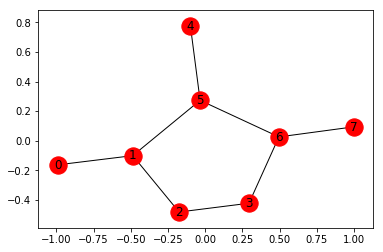

In [3]:
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

On initialise la matrice R

In [4]:
# how many points in graph? 8 points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    #print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

On initialise la matrice Q et on décide des différents paramètres d'apprentissage de l'algorithme

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

On définit les différentes chemins que le programme peut prendre en fonction de l'endroit où il se trouve

In [6]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

On définit le chemin que prend le programme en fonction des différents chemns possibles

In [7]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_actions_range,1))
    #print(next_action)
    return next_action

La fonction d'update du programme

In [8]:
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  #print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)


On lance la première itération

In [9]:
available_act = available_actions(initial_state) 
action = sample_next_action(available_act)
u = update(initial_state, action, gamma)

On lance le training, 700 est un nombre arbitraire

In [10]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.          51.17867881   0.           0.           0.
    0.           0.           0.        ]
 [ 40.94294305   0.          51.17867881   0.           0.
   63.97334852   0.           0.        ]
 [  0.          51.17867881   0.          63.97334852   0.
    0.           0.           0.        ]
 [  0.           0.          51.17867881   0.           0.
    0.          79.96668565   0.        ]
 [  0.           0.           0.           0.           0.
   63.97334852   0.           0.        ]
 [  0.          51.17867881   0.           0.          51.17867881
    0.          79.96668565   0.        ]
 [  0.           0.           0.          63.96206317   0.
   63.97334852   0.          99.95835706]
 [  0.           0.           0.           0.           0.
    0.          79.96668565 100.        ]]


On teste le resultat obtenu

Most efficient path:
[0, 1, 5, 6, 7]


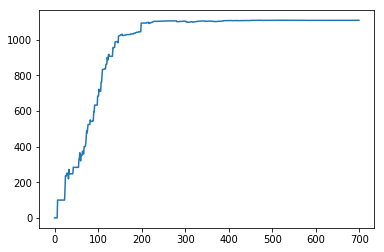

In [11]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

Le meilleur chemin est bien celui obtenu par l'algorithme. On voit que ce dernier converge en 400 itérations.